# Figures for Vero's talk at the miapbp workshop in Oct 2023

## 0. Packages and data

In [8]:
#path='G:/Shared drives/BeStarsMiMeS/UpdatedFiles/' #Patrick's google file stream path
path = '/Users/vpetit/Google Drive/Shared drives/BeStarsMiMeS/UpdatedFiles/' # Vero's google file stream path

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const
import specpolFlow as pol
import pandas as pd

In [116]:
# The Be star main table

sheet_id = '1M6y1Wnsrc-w5FjUMfKaSFa_-foIDAaMe8W4lYNWnWyk'
sheet_name = 'Stars'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
StarData=pd.read_csv(url)

sheet_name = 'Observations'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
Observations=pd.read_csv(url)

# Loading data for the Bstars, using the updated table from Gregg and Tali/Marisol's pieces of codes

B_sheet_id = '1Q5-K6h5U86aEy89SNt-Uh44IW0j9dLUuM8Dx11wEW2Y'
B_sheet_name = 'Singles'
B_url = f'https://docs.google.com/spreadsheets/d/{B_sheet_id}/gviz/tq?tqx=out:csv&sheet={B_sheet_name}'
B_sheet = pd.read_csv(B_url)

## 1.1 3 Sigma Bz histogram

/var/folders/b0/wx58lg256fd4p48kl1w5l1zw0000gp/T/ipykernel_83355/98279770.py:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax.hist([model.groupby("Star").median()['V bz sig (G)'], B_sheet.groupby("HD").median()["sigma"] ],label=['Be Stars', 'Normal B stars'],


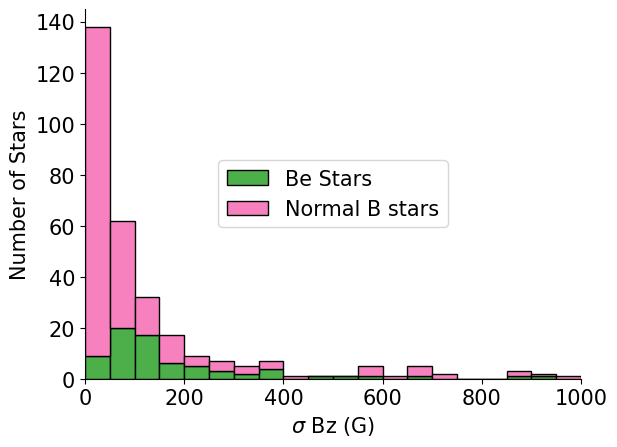

In [125]:
models=['hybrid_maskdepth0.1_tellClean',
 'hybrid_maskdepth0.02_tellClean',
 'hybrid_CleanAsif+tellClean',
 'hybrid_CleanAsifTweak+tellClean',
 'normalized_maskdepth0.1_tellClean',
 'normalized_maskdepth0.02_tellClean',
 'normalized_CleanAsif+tellClean',
 'normalized_CleanAsifTweak+tellClean']

i = 6

model=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[i]))

v_sig=np.abs(model['V bz sig (G)'])

binwidth=50
bins=np.arange(0, max(v_sig) + binwidth, binwidth)

fig, ax = plt.subplots(1,1)

ax.hist([model.groupby("Star").median()['V bz sig (G)'], B_sheet.groupby("HD").median()["sigma"] ],label=['Be Stars', 'Normal B stars'],
        bins=bins, stacked=True, color=['#4daf4a','#f781bf'], ec='k')


#ax.hist(np.abs(Bstar_Bz),label='Normal B stars',bins=bins,color='#4daf4a',alpha=0.9)
#ax.hist(v_sig,label='{}'.format('Be stars'),bins=bins,alpha=0.9,color='#f781bf')



#ax.axvline(np.median(np.abs(Bstar_Bz)),color='darkgreen',linewidth=3,alpha=1,linestyle='dashed', label='Normal B Star Median')
#ax.axvline(np.mean(np.abs(Bstar_Bz)),color='darkgreen',linewidth=3,alpha=1,linestyle='solid', label='Normal B Star Mean')
#ax.axvline(np.median(np.abs(v_sig)),color='#984ea3',linewidth=3,alpha=1,linestyle='dashed', label='Be Star Median')
#ax.axvline(np.mean(np.abs(v_sig)),color='#984ea3',linewidth=3,alpha=1,linestyle='solid', label='Be Star Mean')

ax.set_xlabel('$\sigma$ Bz (G)',size=15)
ax.set_ylabel('Number of Stars',size=15)
#plt.ylim(0,40)
ax.set_xlim(0,1000)
ax.spines[['right', 'top']].set_visible(False)


ax.legend(loc=10)

In [118]:
model

,Unnamed: 0,Star,Ic,cog,Bzwidth min,Bzwidth max,V bz (G),V bz sig (G),V FAP,N1 bz (G),N1 bz sig (G),N1 FAP,N2 bz (G),N2 bz sig (G),N2 FAP
0,0,hd6226,0.999819,-70.000000,-160.000000,20.000000,29.602942,51.487927,0.223868,22.223077,51.378540,0.011862,0.0,0.0,0.0
1,1,hd7636,0.999967,0.000000,-150.000000,150.000000,-62.213279,124.203300,0.869061,-8.682478,124.889293,0.019363,0.0,0.0,0.0
2,2,hd7636,0.999972,0.000000,-150.000000,150.000000,70.503895,91.431660,0.696270,43.720607,91.141704,0.150126,0.0,0.0,0.0
3,3,hd10144,0.999968,12.981952,-232.018048,257.981952,27.894763,25.334783,0.233888,28.167875,25.334791,0.755958,0.0,0.0,0.0
4,4,hd10516,0.999337,-60.990786,-340.990786,219.009214,26.109617,51.365669,0.813275,-15.304394,51.273582,0.371736,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,196,hd221507,0.997600,0.000072,-39.999928,40.000072,-17.103494,12.394948,0.844438,2.049464,12.394717,0.964853,0.0,0.0,0.0
197,197,hd224686,0.999147,11.694301,-278.305699,301.694301,-138.634807,430.278854,0.919362,146.514530,430.284238,0.945834,0.0,0.0,0.0
198,198,hd224686,0.999168,8.724928,-281.275072,298.724928,1165.230817,340.997610,0.099235,156.145312,337.079338,0.183263,0.0,0.0,0.0
199,199,hd239712,0.999910,-0.002959,-290.002959,289.997041,-9.319437,337.626249,0.168665,55.165702,339.219031,0.512564,0.0,0.0,0.0


## 1.2 vsini Histogram

/var/folders/b0/wx58lg256fd4p48kl1w5l1zw0000gp/T/ipykernel_83355/2440584348.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax.hist([Bevsini, B_sheet.groupby("HD").mean()["vsini"] ],label=['Be Stars', 'Normal B stars'],


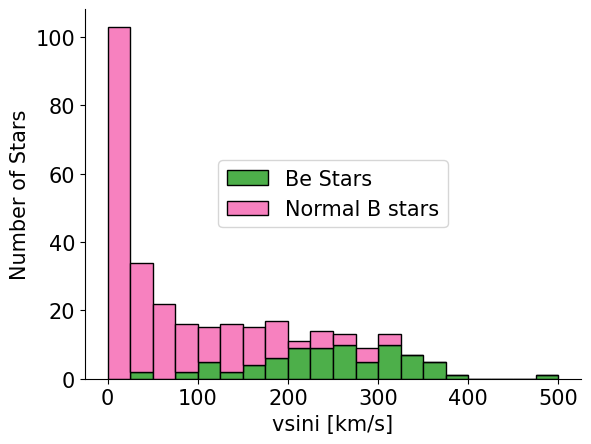

In [117]:
Bevsini=StarData['Adopted-vsini']

binwidth=25
bins=np.arange(0, max(Bevsini) + binwidth, binwidth)


fig, ax = plt.subplots(1,1)

#plt.hist(B_sheet.groupby("HD").mean()["vsini"], 50, color = 'b', align='mid', label='B Stars')


ax.hist([Bevsini, B_sheet.groupby("HD").mean()["vsini"] ],label=['Be Stars', 'Normal B stars'],
        bins=bins, stacked=True, color=['#4daf4a','#f781bf'], ec='k')

#,color='#4daf4a'

#ax.hist(np.abs(Bstar_vsini),label='{}'.format('Be stars'),bins=bins,alpha=0.9,color='red')
#ax.hist(Bevsini,label='{}'.format('Be stars'),bins=bins,alpha=0.9,color='#f781bf')


ax.set_xlabel('vsini [km/s]',size=15)
ax.set_ylabel('Number of Stars',size=15)
#plt.ylim(0,20)
#plt.xlim(0,2000)
#plt.title('vsini [km/s]',size=15)
ax.spines[['right', 'top']].set_visible(False)
ax.legend(loc=10)

## 3. Model Comparisons

Text(0.5, 1.0, 'Bz (G)')

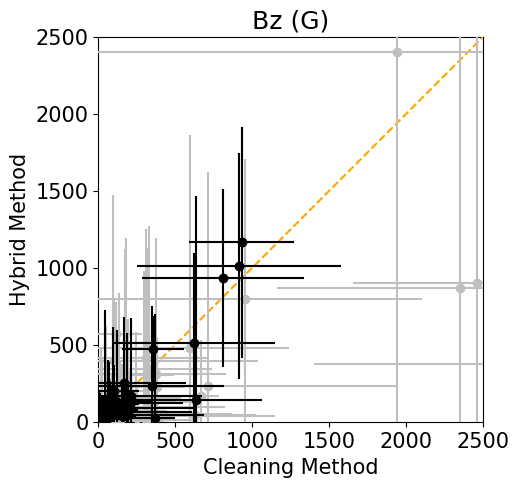

In [208]:
models=['hybrid_maskdepth0.1_tellClean', #0
 'hybrid_maskdepth0.02_tellClean',      #1
 'hybrid_CleanAsif+tellClean',          #2
 'hybrid_CleanAsifTweak+tellClean',     #3
 'normalized_maskdepth0.1_tellClean',   #4
 'normalized_maskdepth0.02_tellClean',  #5
 'normalized_CleanAsif+tellClean',      #6
 'normalized_CleanAsifTweak+tellClean'] #7

i=6
j=1

model1=pd.read_csv('{}04-Bz-calculations/WellBehavedStars/{}_GOOD.csv'.format(path,models[i]))
#model=pd.read_csv('/content/drive/Shareddrives/BeStarsMiMeS/04-Bz-calculations/{}.csv'.format(models[i]))
v_sig1=np.abs(model1['V bz (G)'])
sig1=np.abs(model1['V bz sig (G)'])

modelall1=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[i]))
v_sigall1=np.abs(modelall1['V bz (G)'])
sigall1=np.abs(modelall1['V bz sig (G)'])

model2=pd.read_csv('{}04-Bz-calculations/WellBehavedStars/{}_GOOD.csv'.format(path,models[j]))
#model=pd.read_csv('/content/drive/Shareddrives/BeStarsMiMeS/04-Bz-calculations/{}.csv'.format(models[i]))
v_sig2=np.abs(model2['V bz (G)'])
sig2=np.abs(model2['V bz sig (G)'])

modelall2=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[j]))
v_sigall2=np.abs(modelall2['V bz (G)'])
sigall2=np.abs(modelall2['V bz sig (G)'])


fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.set_aspect('equal')
plt.rcParams.update({'font.size': 15})

#n = np.where(sigall2 < 250)[0]
#ax.errorbar(v_sigall1[n], v_sigall2[n], sigall1[n], sigall2[n], marker='o',fmt='none', c='0.75' )
ax.errorbar(v_sigall1, v_sigall2, sigall1, sigall2, marker='o',fmt='none', c='0.75',zorder=1000 )
ax.scatter(v_sigall1, v_sigall2, label='High contamination', c='0.75', zorder=2000)


#n = np.where(sig1 < 250)[0]
#ax.errorbar(v_sig1[n], v_sig2[n], sig1[n], sig2[n], marker='o',fmt='none', c='k' )
ax.errorbar(v_sig1, v_sig2, sig1, sig2, marker='o',fmt='none', c='k',zorder=3000 )
ax.scatter(v_sig1,v_sig2, label='Low contamination', c='k', zorder=4000)

ax.plot([0,2500], [0,2500], c='orange', ls='--', zorder=500)

#ax.legend()
#ax.set_xlabel('Bz using {}'.format(models[i]))
ax.set_xlabel('Cleaning Method')
#ax.set_ylabel('Bz using {}'.format(models[j]))
ax.set_ylabel('Hybrid Method')


ax.set_xlim(0,2500)
ax.set_ylim(0,2500)
ax.set_title('Bz (G)')

(0.0, 1300.0)

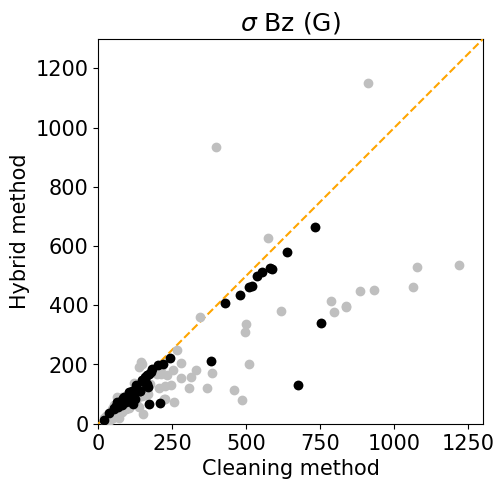

In [207]:
models=['hybrid_maskdepth0.1_tellClean', #0
 'hybrid_maskdepth0.02_tellClean',      #1
 'hybrid_CleanAsif+tellClean',          #2
 'hybrid_CleanAsifTweak+tellClean',     #3
 'normalized_maskdepth0.1_tellClean',   #4
 'normalized_maskdepth0.02_tellClean',  #5
 'normalized_CleanAsif+tellClean',      #6
 'normalized_CleanAsifTweak+tellClean'] #7

i=6
j=1
model1=pd.read_csv('{}04-Bz-calculations/WellBehavedStars/{}_GOOD.csv'.format(path,models[i]))
#model=pd.read_csv('/content/drive/Shareddrives/BeStarsMiMeS/04-Bz-calculations/{}.csv'.format(models[i]))
v_sig1=np.abs(model1['V bz sig (G)'])

modelall1=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[i]))
v_sigall1=np.abs(modelall1['V bz sig (G)'])

model2=pd.read_csv('{}04-Bz-calculations/WellBehavedStars/{}_GOOD.csv'.format(path,models[j]))
#model=pd.read_csv('/content/drive/Shareddrives/BeStarsMiMeS/04-Bz-calculations/{}.csv'.format(models[i]))
v_sig2=np.abs(model2['V bz sig (G)'])

modelall2=pd.read_csv('{}04-Bz-calculations/{}.csv'.format(path,models[j]))
v_sigall2=np.abs(modelall2['V bz sig (G)'])


fig, ax = plt.subplots(1,1, figsize=(5,5))
plt.rcParams.update({'font.size': 15})
ax.set_aspect('equal')

ax.scatter(v_sigall1, v_sigall2, label='High contamination', c='0.75', zorder=4000)
ax.scatter(v_sig1,v_sig2, label='Minimal contamination', c='k', zorder=5000)

ax.plot([0,1300],[0,1300], c='orange', ls='--', zorder=3000)

#ax.legend()

ax.set_ylabel('Hybrid method')
ax.set_xlabel('Cleaning method')
ax.set_title(r'$\sigma$ Bz (G)')

ax.set_xlim(0,1300)
ax.set_ylim(0,1300)

## Method illustration

In [133]:
def read_disk(file):
  '''
  Read a synthetic spectrum from a s3div output

  :param file: The filename
  :rtype: wave, flux -- the wavelength in nm, and the normalized flux. 
  '''
  with open(file) as f:
    lines = f.readlines()
  # number of atomic lines in the header of the file
  natomic = int(lines[0].split(sep='-')[0])
  nwave=int(lines[natomic+1].split()[0])
  data = np.genfromtxt(lines[natomic+2:natomic+1+nwave])
  return(data[:,0]/10.0, data[:,1])

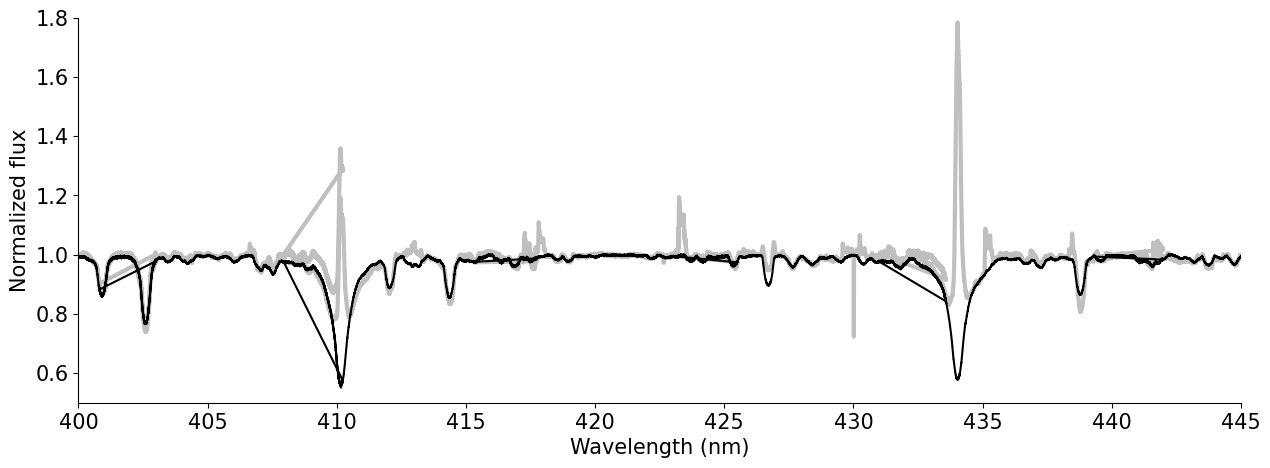

In [143]:
star = 'hd148184'

file = '{}00-InputMaterial/NormalizedSpectra/{}_1.s'.format(path,star)
data = pol.read_spectrum(file)

file = '{}01-Synth-calculations/Synth-diskint-spectra/{}.dsk'.format(path,star)
wl, f = read_disk(file)

file = '{}01-Synth-calculations/Synth-hybrid-spectra/{}_1_noise.s'.format(path,star)
hybrid = pol.read_spectrum(file)

fig, ax = plt.subplots(1,1, figsize=(15,5))

ax.plot(data.wl, data.specI, c='0.75', lw=3)
#ax.plot(wl, f, c='k')
ax.plot(hybrid.wl, hybrid.specI, c='k')
ax.set_xlim(400,445)
ax.set_ylim(0.5, 1.8)
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Normalized flux')

ax.spines[['right', 'top']].set_visible(False)



Text(0.5, 0, 'Velocity (km/s)')

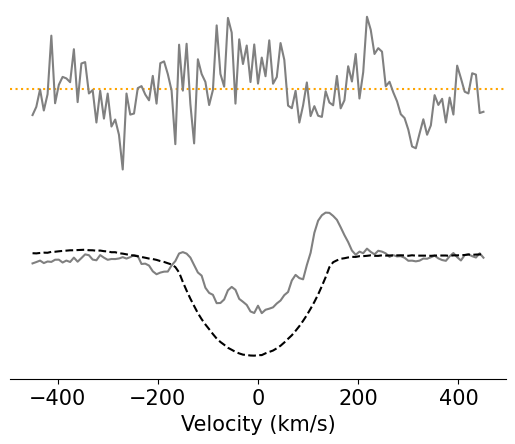

In [186]:
star = 'hd148184'

fig, ax = plt.subplots(2,1)
ax[0].axhline(y=0, ls='dotted', c='orange')


file = '{}03-LSD-calculations/LSD/normalized_maskdepth0.02_tellClean/{}_1.lsd'.format(path,star)
lsd = pol.read_lsd(file)
ax[1].plot(lsd.vel, lsd.specI, c='0.5')
ax[0].plot(lsd.vel, lsd.specV, c='0.5')

file = '{}03-LSD-calculations/LSD/hybrid_maskdepth0.02_tellClean/{}_1.lsd'.format(path,star)
lsd = pol.read_lsd(file)
ax[1].plot(lsd.vel, lsd.specI, c='k', ls='--')

file = '{}03-LSD-calculations/LSD/normalized_CleanAsif+tellClean/{}_1.lsd'.format(path,star)
lsd = pol.read_lsd(file)
#ax[1].plot(lsd.vel, lsd.specI)


ax[1].set_ylim(0.985, 1.005)

ax[1].spines[['right', 'top','left']].set_visible(False)
ax[1].get_yaxis().set_visible(False)

ax[0].get_yaxis().set_visible(False)
ax[0].get_xaxis().set_visible(False)

ax[0].spines[['right', 'top','left','bottom']].set_visible(False)

ax[1].set_xlabel('Velocity (km/s)')


0.00033546262790251185


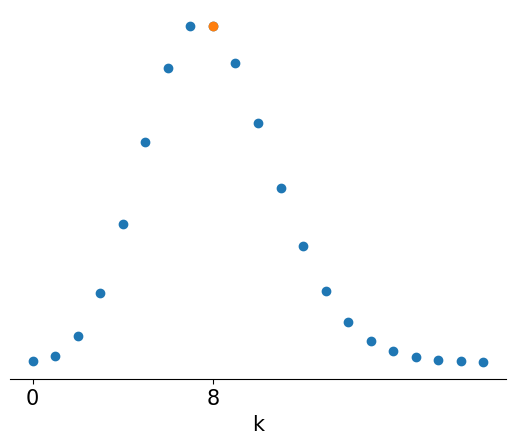

In [204]:
from scipy.stats import poisson

#calculate probability
k = np.linspace(0,20,21)
p = np.zeros(k.size)

for i in range(0,k.size):
    p[i] = poisson.pmf(k=k[i], mu=8)

fig, ax = plt.subplots(1,1)

ax.scatter(k, p)
ax.scatter([8], poisson.pmf(k=8,mu=8))

ax.spines[['right', 'top', 'left']].set_visible(False)
ax.get_yaxis().set_visible(False)

ax.set_xticks([0,8])

ax.set_xlabel('k')

print(poisson.pmf(k=0,mu=8))
